In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [2]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2)

In [3]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [4]:
X.shape

(100, 2)

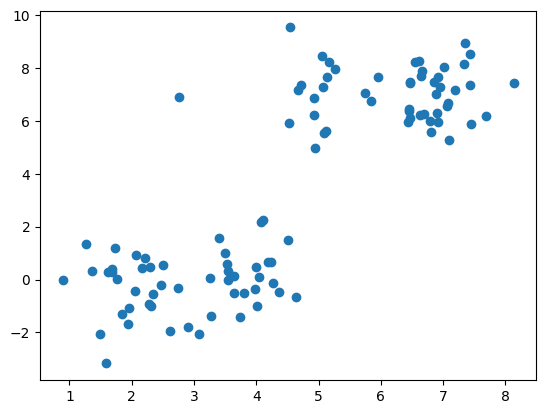

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

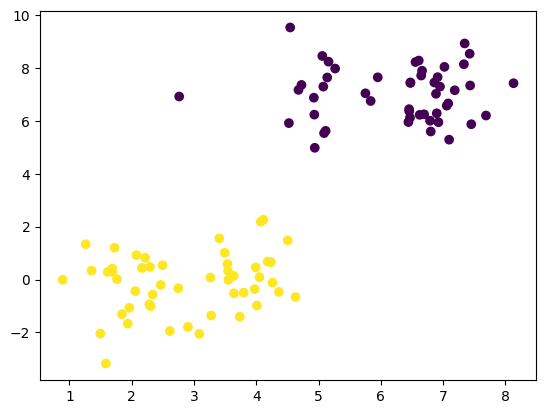

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Choix des Centroides

In [7]:
import random
def getCentroides(X,nbCentroides =2):
    n,m= np.shape(X)
    
    #cent = np.random.random((nbCentroides,m))*(np.max(X)-np.min(X))
    #cent = np.random.random_sample((nbCentroides,m))
    
    cent = X[random.sample(range(0,len(X)),nbCentroides)]
    
    return cent

centroides = getCentroides(X,nbCentroides=2)



In [8]:
centroides

array([[6.45384927, 6.44467899],
       [4.0510789 , 0.09061707]])

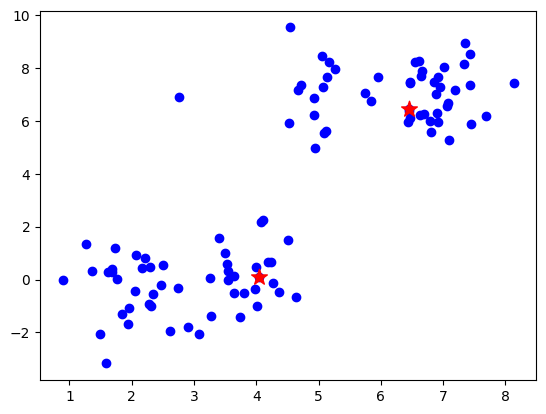

In [9]:
plt.scatter(X[:,0],X[:,1],c="b")
plt.scatter(centroides[:,0],centroides[:,1],c="r",s=140,marker="*")  #s :size des points

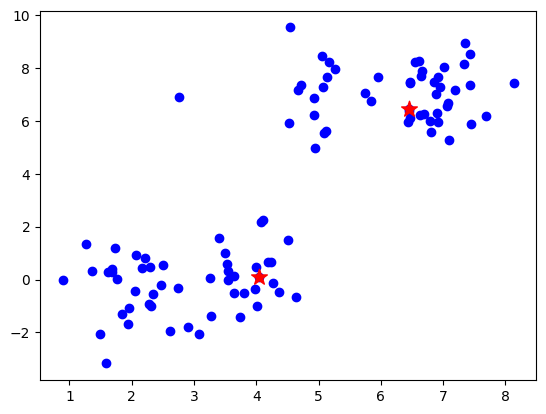

In [10]:
def plotObsCentroides2D(X,centroides,affectationObs="b",colorCentr='r',alphaC=1,titre=""):
    
    plt.scatter(X[:,0],X[:,1],c=affectationObs)
    plt.scatter(centroides[:,0],centroides[:,1],c=colorCentr,s=140,marker="*",alpha = alphaC)
    plt.title(titre)
    
plotObsCentroides2D(X,centroides)

Calcul de distances 

In [11]:
from time import sleep
from sklearn.metrics import mean_squared_error
def distanceEuclObservationsCentroid(X,centroides):
    distances = []
    for i in range(len(X)):
        d = mean_squared_error(X[i],centroides)
        distances.append(d)
    return distances
        

In [12]:
def CalculDistanceObsCentroides(X,centroides):
    
    distances = np.zeros((len(centroides),len(X)))
    for i in range(len(centroides)):
        distances[i]=distanceEuclObservationsCentroid(X,centroides[i])
    return distances

In [13]:
distances[0]

NameError: name 'distances' is not defined

Affectation des observations aux clusters

In [14]:
def AffectationObservationsCentroides(X,centroides):
    liste = []
    distances =CalculDistanceObsCentroides(X,centroides)
    for i in range (len(distances[:,0])):
        indice = np.argmin(distances[:,i])
        liste.append(indice)
    return liste

        

In [15]:
listeAffec=AffectationObservationsCentroides(X,centroides)

In [16]:
#2eme fct
def AffectationObservationsCentroides(X,centroides):
    listeAffectations = np.zeros(len(X))
    distances =CalculDistanceObsCentroides(X,centroides)
    JW = 0
    for i in range (len(X)):
        indice = np.argmin(distances[:,i])
        JW+=distances[indice,i]
        ListeAffectations[i]=indice
    return listeAffectations,JW

        

In [17]:
def recalculCentroides(X,Centroides):
    newcentroides = centroides.copy()
    affecatationsObs ,JW= AffectationObservationsCentroides(X,centroides)
    
    for i in range(len(centroides)):
        args = np.where(affectationsObs == i)
        
        for j in range(centroides.shape[1]):
            if len(args[0])!=0:
                newCentroides[i,j]=np.sum(X[args[0],j])/len(args[0])
    return newCentroides,JW,affectations

Kmeans Algorithme

In [18]:
def KmeansAlgorithme(X,centroides,iterations=2,plot=False):
    centers = centroides.copy()
    centersHistory = []
    centerHistory.append(centers)
    JWs=[]
    for i in range(1,iterations+1):
        centers, JW,affecatationsObs = recalculCentroides(X,Centers)
        centerHistory.append(centers)
        JWs.append(JW)
    return centers,JWs,affectationsObs